# SVM Multiclase y SVR

En este _notebook_ vamos a aprender cómo hacer clasificación multiclase usando el modelo SVM y además veremos que este modelo es útil además para hacer regresión.

## SVM Multiclase

Vamos a mostrar un ejemplo sencillo con el _dataset_ de flores _Iris_ y vamos a gráficar la frontera de decisión (_Decision Boundary_) del modelo entrenado. Primero vamos a importar las librerías y los datos.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Importamos los datos
iris = datasets.load_iris()

# Tomamos el largo y ancho del pétalo, respectivamente
X = iris.data[:, [2, 3]]
# Los target son setosa, versicolor y virginica
y = iris.target

Vamos a usar SVM con un kernel rbf. Es importante mencionar que SVM no soporta nativamente clasificación multiclase, por lo que debemos usar alguna de las técnicas mencionadas anteriormente en el curso: *one versus one* o bien *one versus the rest*. Esto se lo indicamos al constructor de la clase `SVC` en el parámetro `decision_function_shape`.

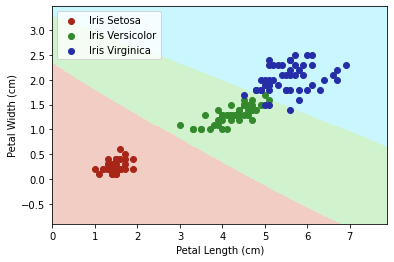

In [20]:
# Colores
cmap_light = ListedColormap(['#f2cdc3', '#d0f2cd', '#c9f6ff'])
cmap_bold = ['#a72618', '#34892d', '#262ea7']

# SVM escalado
# Ojo, tenemos que señalarle que queremos que use One vs One (ovo) en vez the ovr
poly_kernel_svm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('svm_clf', SVC(kernel='rbf', gamma=0.1, C=0.001, decision_function_shape='ovo'))
    ])
poly_kernel_svm_clf.fit(X, y)

# Buscamos los límites del gráfico
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Generamos las combinaciones de x/y del plano en los rangos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = poly_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Resultado de la frontera de decisión con color claro
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.scatter(X[y==0, 0], X[y==0, 1], c=cmap_bold[0], label='Iris Setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(X[y==2, 0], X[y==2, 1], c=cmap_bold[2], label='Iris Virginica')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()

Es una buena idea que pruebes cómo se comporta este modelo para distintos valores de gamma y C. Verás que hay algunas versiones que generalizan bastante mal.

# SVR

Ahora vamos a ver cómo hacer regresión con SVM. Para hacer esto vamos a invertir nuestro objetivo: en vez de tratar de hacer pasar la calle lo más ancha posible, lo que vamos a hacer es tratar de tener la mayor cantidad de instancias dentro de la calle mientras limitamos la cantidad de elementos fuera de la calle. El ancho de la calle se controla por un hiperparámetro $\epsilon$. En caso de querer hacer regresión no lineal, podemos también usar el truco del kernel. Vamos a ver cómo implementar esto en Scikit Learn.

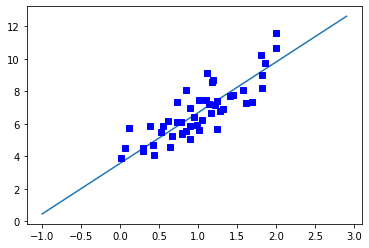

In [31]:
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt

m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

# Aquí hacemos regresión con SVM
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

# Esto es para graficar la predicción
X_p = np.arange(-1, 3, 0.1)
X_p = X_p.reshape(-1, 1)

plt.plot(X_p, svm_reg.predict(X_p))
plt.plot(X, y, 'bs')

Y ahora para datos que ditribuyen de forma cuadrática.

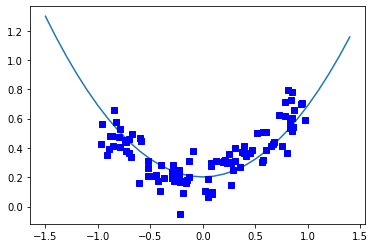

In [37]:
from sklearn.svm import SVR

m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

# Aquí usamos la clase SVR
# El valor de C nos permite regularizar y prevenir el overfit
svm_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_reg.fit(X, y)

X_p = np.arange(-1.5, 1.5, 0.1)
X_p = X_p.reshape(-1, 1)

plt.plot(X_p, svm_reg.predict(X_p))
plt.plot(X, y, 'bs')